In [ ]:
!pip install pandas
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# **1. Perform Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is a technique to analyze data using some visual Techniques. With this technique, we can get detailed information about the statistical summary of the data. We will also be able to deal with the duplicates values, outliers, and also see some trends or patterns present in the dataset.

In [ ]:
data=sns.load_dataset( 'iris')

The data set will be read and stored in the data frame format.

Let’s display the first five rows of the data set.

In [ ]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


use the shape parameter to get the shape of the dataset.

In [ ]:
data.shape

(150, 5)

We can see that the dataframe contains 6 columns and 150 rows.

We have four features, SepalLength, SepalWidth, PetalLength, and PetalWidth. The last feature, 'Species,' is the target feature that will be predicted.

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Let’s have the information about the data type of the data set.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


SepalLength, SepalWidth, PetalLength, and PetalWidth have float data types. 'Species' has an object data type. Let's check the number of samples of each class in Species.

In [ ]:
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64



In each class, we have fifty samples.

While training the model, we must remove all the null values with other deals like mean, median, mode, etc. To check whether the data set contains the null values, We write.

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null or nan values in the datasets.

Now, We will visualize the data in the form of graphs. First, let's display some basic charts. For each column, let us create a histogram.

In [ ]:
df = data.drop_duplicates(subset ="species",)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 2. **Perform Data Visualization.**

<Axes: >

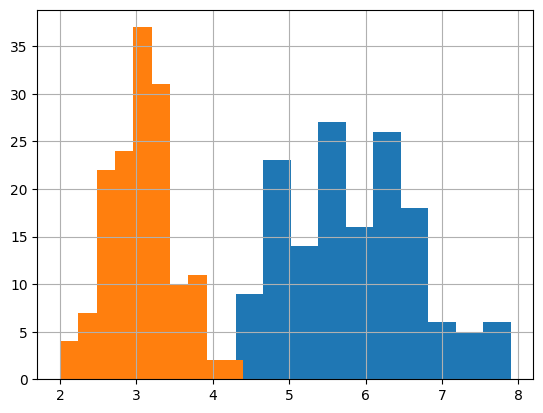

In [ ]:
data['sepal_length'].hist()
data['sepal_width'].hist()

Blue - SepalLenth
                 , Orange- SepalWidth

<Axes: >

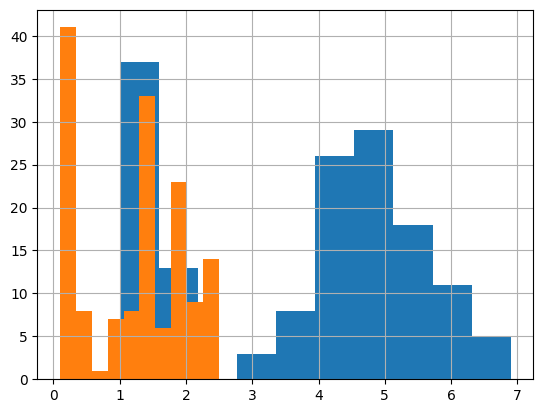

In [ ]:
data['petal_length'].hist()
data['petal_width'].hist()

We can observe that the histogram plot of all the features follows the normal distribution.
If the size of the data set is large enough, the normal distribution is a good approximation.

In Machine learning, we usually deal with the dataset which contains multiple labels in columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into the numeric form into the machine-readable form.

The output class is in the categorical form in this data set, and we need to convert it into the numeric format. So We will use Label Encoder.

# **3. Data Preprocessing and Cleaning**

Handling Outliers
An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s dataframe.

<Axes: xlabel='sepal_length'>

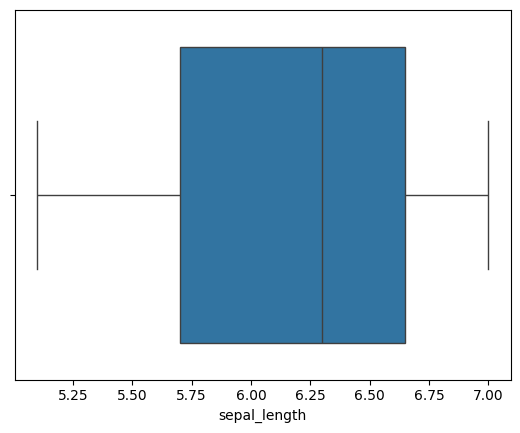

In [ ]:
sns.boxplot(x='sepal_length', data=df)

# **Removing Outliers**
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Create a z-score for the column 'sepal_length'

from scipy import stats

z_scores = stats.zscore(df['sepal_length'])

# Display the z-scores
z_scores

0     -1.317064
50     1.104634
100    0.212430
Name: sepal_length, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])
data.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


After preprocessing all the data sets, we need to train and test our model. So, let's import the model.

In [ ]:
from sklearn.model_selection import train_test_split

We need to separate the classes for input and output attributes. Let's drop the columns ‘Species’ and store the remaining input attributes to the variable X. The output attribute, i.e., ‘Species,’ is taken in the variable Y.

In [ ]:
X = data.drop(columns = ['species'])
Y = data['species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((112, 4), (38, 4), (112,), (38,))

Now let's import a basic classification model called logistic Regression from SKlearn.

# **4. Make Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


Now, let's train the model.

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

Let's print the metric to get the performance.

In [ ]:
# Making predictions
predictions = model.predict(X_test)

In [ ]:
predictions

array([2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2])

In [ ]:
Y_test.values

array([2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2])

# **5. Find the correct performance metric and the best model**

In [ ]:
# Checking the accruacy of the model
from sklearn.metrics import accuracy_score
print("The accuracy of the logistic regression model is :", accuracy_score(predictions,Y_test)*100)

The accuracy of the logistic regression model is : 100.0


In [ ]:
print("The accuracy of the logistic regression model is :", model.score(X_test, Y_test) * 100)

The accuracy of the logistic regression model is : 100.0


In [ ]:
print("X_test type:", type(X_test))
print("Y_test type:", type(Y_test))

X_test type: <class 'pandas.core.frame.DataFrame'>
Y_test type: <class 'pandas.core.series.Series'>


# **The accuracy of the logistic regression model is : 100.0**
